In [27]:
past_targets = 7

In [28]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras as tfk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/sandp500")

In [30]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/FDX_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMAT_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/GLW_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/ANSS_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/DVN_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CBG_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/TSS_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/JEC_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/VRTX_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/FBHS_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AOS_data.csv
/kaggle/input/sandp500/individual_sto

In [31]:
all_stocks = pd.read_csv("/kaggle/input/aapl-1-year-historic-stock-data/AAPL1y.csv")

all_stocks

,Date,Close/Last,Volume,Open,High,Low
0,04/22/2025,$199.74,52976370,$196.12,$201.59,$195.97
1,04/21/2025,$193.16,46742540,$193.265,$193.80,$189.8112
2,04/17/2025,$196.98,52164680,$197.20,$198.8335,$194.42
3,04/16/2025,$194.27,59732420,$198.36,$200.70,$192.37
4,04/15/2025,$202.14,51343870,$201.855,$203.51,$199.80
...,...,...,...,...,...,...
245,04/29/2024,$173.50,68169420,$173.37,$176.03,$173.10
246,04/26/2024,$169.30,44838350,$169.88,$171.34,$169.18
247,04/25/2024,$169.89,50558330,$169.525,$170.61,$168.1511
248,04/24/2024,$169.02,48251840,$166.54,$169.30,$166.21


In [32]:
all_stocks['Close/Last'] = all_stocks['Close/Last'].replace('[\$,]', '', regex=True).astype(float)

In [33]:
all_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        250 non-null    object 
 1   Close/Last  250 non-null    float64
 2   Volume      250 non-null    int64  
 3   Open        250 non-null    object 
 4   High        250 non-null    object 
 5   Low         250 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB


In [44]:
stocks = pd.DataFrame()
stocks['Date'] = pd.to_datetime(all_stocks['Date'])
for i in range(0,past_targets+1):
    stocks['Close'+str(i)] = all_stocks['Close/Last'].shift(periods=i)
stocks = stocks.dropna()
stocks

,Date,Close0,Close1,Close2,Close3,Close4,Close5,Close6,Close7
7,2025-04-10,190.42,198.15,202.52,202.14,194.27,196.98,193.16,199.74
8,2025-04-09,198.85,190.42,198.15,202.52,202.14,194.27,196.98,193.16
9,2025-04-08,172.42,198.85,190.42,198.15,202.52,202.14,194.27,196.98
10,2025-04-07,181.46,172.42,198.85,190.42,198.15,202.52,202.14,194.27
11,2025-04-04,188.38,181.46,172.42,198.85,190.42,198.15,202.52,202.14
...,...,...,...,...,...,...,...,...,...
245,2024-04-29,173.50,170.33,169.30,173.03,183.38,181.71,182.40,182.74
246,2024-04-26,169.30,173.50,170.33,169.30,173.03,183.38,181.71,182.40
247,2024-04-25,169.89,169.30,173.50,170.33,169.30,173.03,183.38,181.71
248,2024-04-24,169.02,169.89,169.30,173.50,170.33,169.30,173.03,183.38


In [ ]:
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = i

In [35]:
def plot_stock(df, x='date', y='close', xlabel='Date', ylabel='Close Prices USD ($)', title=None):
    plt.figure(figsize=(16,6))
    if title:
        plt.title(title)
    sns.lineplot(x=df[x], y=df[y], data=df)
    plt.xticks(rotation=45)
    if x=='date':
        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


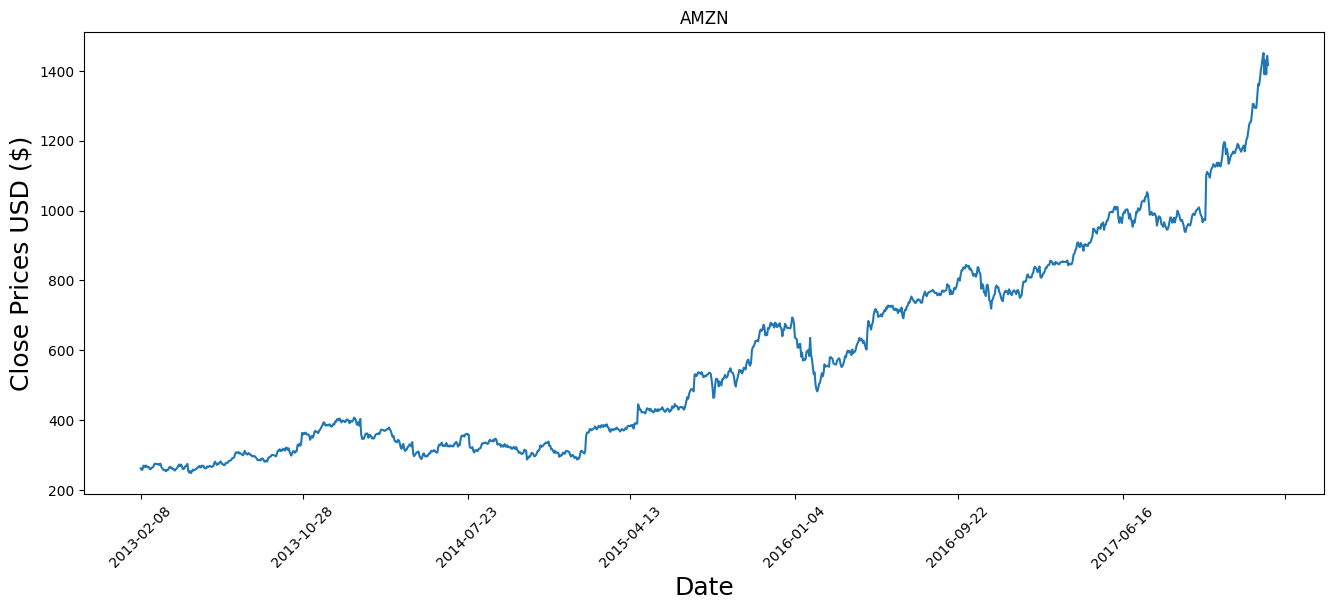

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


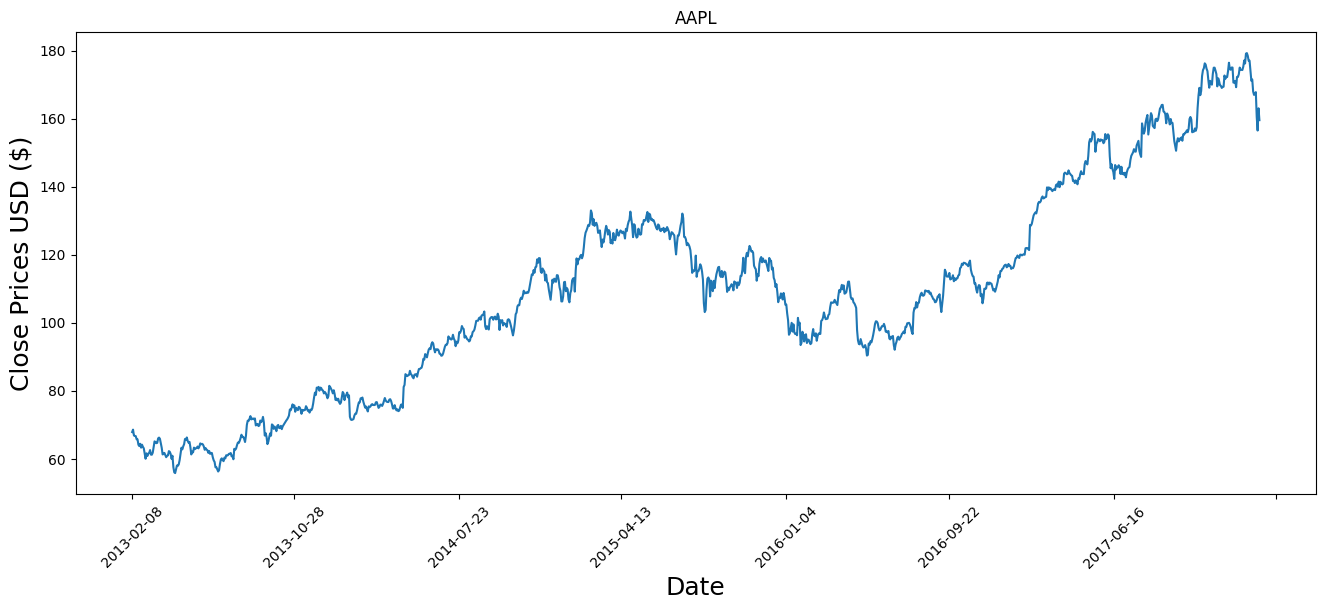

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


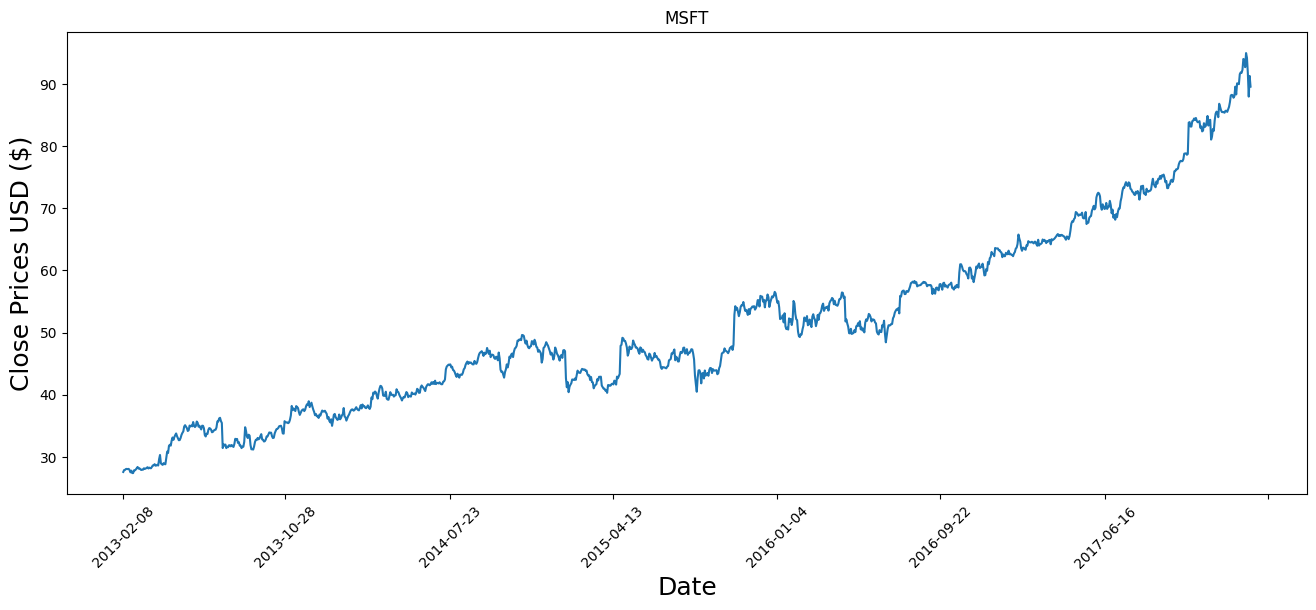

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    975 non-null    object 
 1   open    975 non-null    float64
 2   high    975 non-null    float64
 3   low     975 non-null    float64
 4   close   975 non-null    float64
 5   volume  975 non-null    int64  
 6   Name    975 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 53.4+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


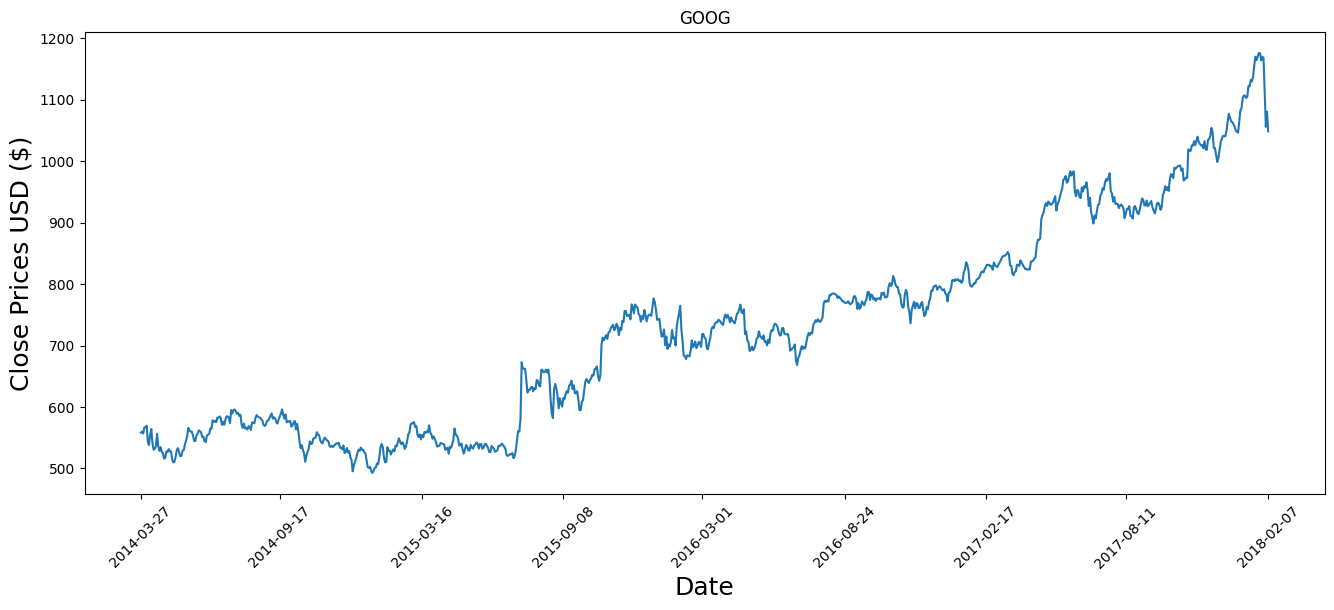

In [36]:
stocks = ["AMZN","AAPL","MSFT","GOOG"]

for stock in stocks:
    stock_df = pd.read_csv('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/' + stock + "_data.csv")
    stock_df.info(verbose=True)
    plot_stock(stock_df, title = stock)

In [37]:
AAPL = pd.read_csv('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv')
GOOG = pd.read_csv('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv')
MSFT = pd.read_csv('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/MSFT_data.csv')
AMZN = pd.read_csv('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMZN_data.csv')

In [38]:
company_list = [AAPL, GOOG, MSFT, AMZN]

In [39]:
datetimes = ['year','month','day']

for company in company_list:
    company['date'] = pd.to_datetime(company['date'])
    company['year'] = company['date'].dt.year
    company['month'] = company['date'].dt.month
    company['day'] = company['date'].dt.day
    company.drop('date',axis=1,inplace=True)
    company.drop('Name',axis=1,inplace=True)
    for col in datetimes:
        company[col + '_sin'] = np.sin(2 * np.pi * company[col]/company[col].max())
        company[col + '_cos'] = np.cos(2 * np.pi * company[col]/company[col].max())
        company.drop(col, axis=1,inplace=True)
    company.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       1259 non-null   float64
 1   high       1259 non-null   float64
 2   low        1259 non-null   float64
 3   close      1259 non-null   float64
 4   volume     1259 non-null   int64  
 5   year_sin   1259 non-null   float64
 6   year_cos   1259 non-null   float64
 7   month_sin  1259 non-null   float64
 8   month_cos  1259 non-null   float64
 9   day_sin    1259 non-null   float64
 10  day_cos    1259 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 108.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       975 non-null    float64
 1   high       975 non-null    float64
 2   low        975 non-null    float64
 3   close     

In [40]:
y = []
for company in company_list:
    y.append(company['close'])

In [41]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(AAPL.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 11, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
company_all = pd.DataFrame()
y_all = pd.DataFrame()
test = []
test_y = []

for company in company_list:
    test.append(company.tail(200))
    company = company.head(900)
    company_all = pd.concat([company_all, company], axis=0)

company_all.drop('close',axis=1,inplace=True)

for ys in y:
    test_y.append(ys.tail(200))
    ys = ys.head(900)
    y_all = pd.concat([y_all, ys], axis=0)

company_all.info()
company_all.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3600 entries, 0 to 899
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3600 non-null   float64
 1   high       3600 non-null   float64
 2   low        3600 non-null   float64
 3   volume     3600 non-null   int64  
 4   year_sin   3600 non-null   float64
 5   year_cos   3600 non-null   float64
 6   month_sin  3600 non-null   float64
 7   month_cos  3600 non-null   float64
 8   day_sin    3600 non-null   float64
 9   day_cos    3600 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 309.4 KB


,open,high,low,volume,year_sin,year_cos,month_sin,month_cos,day_sin,day_cos
0,67.7142,68.4014,66.8928,158168416,-0.015567,0.999879,0.866025,0.5,0.998717,-0.050649
1,68.0714,69.2771,67.6071,129029425,-0.015567,0.999879,0.866025,0.5,0.790776,-0.612106
2,68.5014,68.9114,66.8205,151829363,-0.015567,0.999879,0.866025,0.5,0.651372,-0.758758
3,66.7442,67.6628,66.1742,118721995,-0.015567,0.999879,0.866025,0.5,0.485302,-0.874347
4,66.3599,67.3771,66.2885,88809154,-0.015567,0.999879,0.866025,0.5,0.299363,-0.954139


In [43]:
history = model.fit(company_all, y_all, epochs= 50)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 170496.2656
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 123562.6641
Epoch 3/50
 16/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 87158.1953

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
prediction = model.predict(AAPL)

In [ ]:
def plot_acc_vs_pred(pred, acc):
    plt.figure(figsize=(8, 6))
    plt.plot(pred, label='Model Prediction')
    plt.plot(acc, label='Real Data')
    plt.title('Prediction v Actual')
    plt.xlabel('Non')
    plt.ylabel('Close')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

In [ ]:
plot_acc_vs_pred(prediction, AAPL['close'])

In [ ]:
for idx in range(len(test)):
    y = test_y[idx]
    #test[idx].drop('close',axis=1,inplace=True)
    prediction_test = model.predict(test[idx])
    plot_acc_vs_pred(prediction_test, y)